Estimate the area of a circle of radius r=1

In [86]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
def calc_area(r=1,M = 1e4):

    rand_num = np.random.random((int(M),2))
    
    X,Y = rand_num[:,0],rand_num[:,1]
    
    is_in = (X**2 + Y**2) < r
    
    A = 4*len(X[is_in])/M
    
    return A

In [92]:
areas = []
m_values = np.linspace(1000,1e4)
for m in m_values:
    area_mean = 0
    trials = 100
    for i in range(trials):
        area_mean += calc_area(M = m)/trials
        
    areas.append(area_mean)

KeyboardInterrupt: 

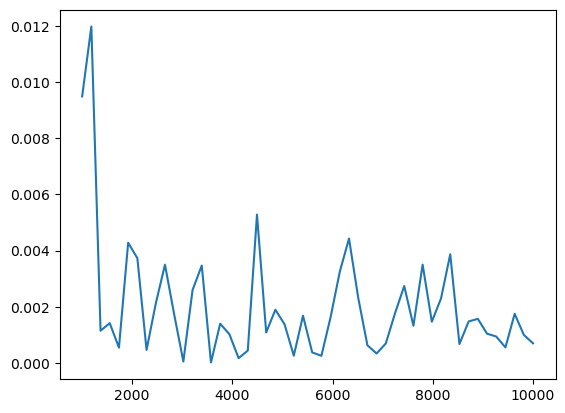

In [91]:
plt.plot(m_values,abs(np.array(areas)-np.pi))